In [23]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split

In [24]:
path = 'Dataset_BUSI_with_GT/'

In [25]:
def num (image) :
    
    val = 0
    
    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break
    
    return val

In [26]:
X_b, y_b = np.zeros((437, 128, 128, 1)), np.zeros((437, 128, 128, 1))
X_n, y_n = np.zeros((133, 128, 128, 1)), np.zeros((133, 128, 128, 1))
X_m, y_m = np.zeros((210, 128, 128, 1)), np.zeros((210, 128, 128, 1))

In [27]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           # read image as  grayscale
        
        if image[-5] == ')' :
            
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                X_b[num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                           # to X as benign , normal
                X_n[num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)
            
            if image[0] == 'b' :
                y_b[num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                           # mask to y.
                y_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                y_m[num(image)-1]+= img_to_array(pil_img)

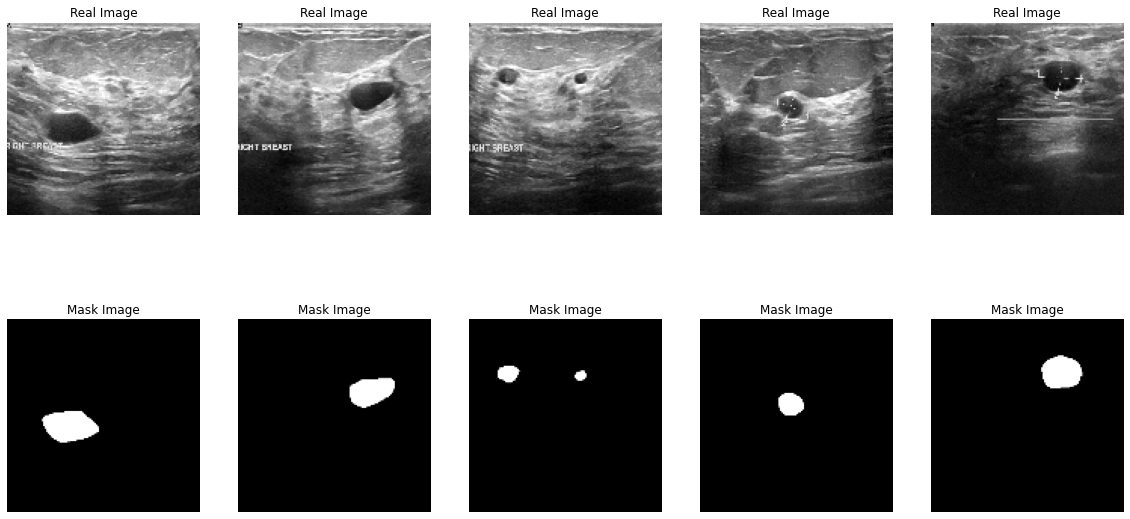

In [28]:
plt.figure(figsize = (20,10))

for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(X_b[i+1], 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(y_b[i+1], 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

In [29]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)

In [30]:
X /= 255.0
y /= 255.0

In [48]:
print(X.shape)
print(y.shape)

(780, 128, 128, 1)
(780, 128, 128, 1)


In [49]:
print(X.max())
print(X.min())

2.0
0.0


In [50]:
print(y.max())
print(y.min())

4.0
0.0


In [31]:
y[y > 1.0] = 1.0

In [52]:
print(y.max())
print(y.min())

1.0
0.0


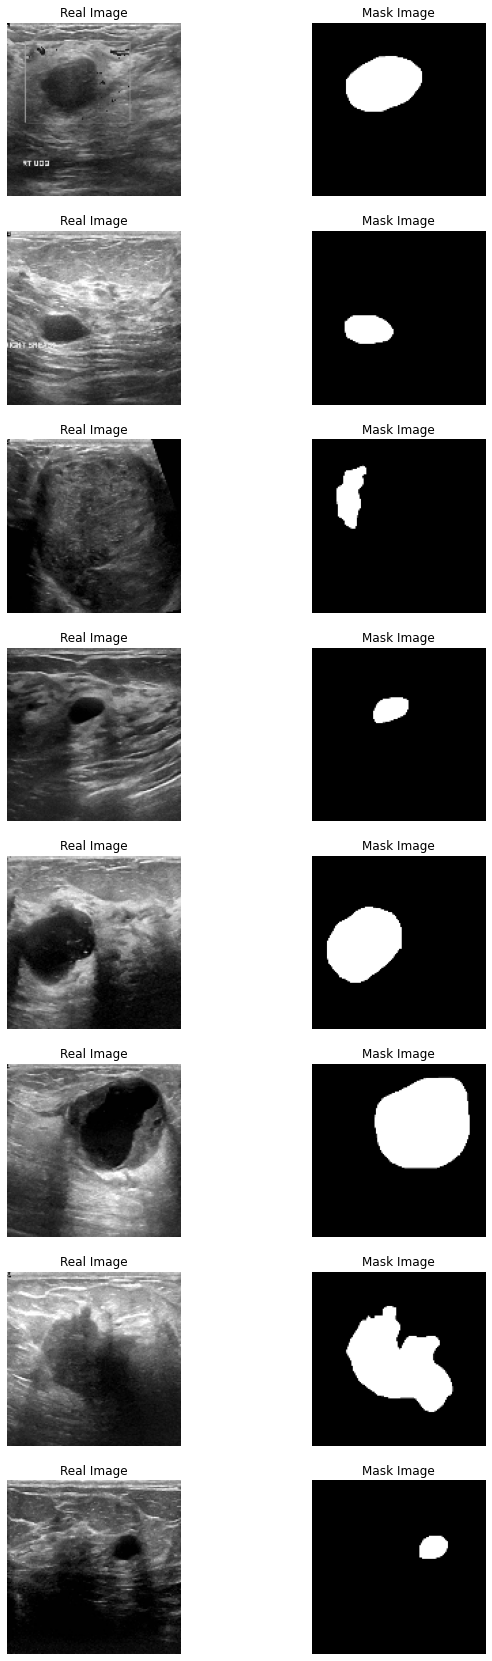

In [32]:
plt.figure(figsize = (10,30))
i = 0
while i < 16 :
    
    x = np.random.randint(0,780)
    
    plt.subplot(8,2,i+1)
    plt.imshow(X[x],'gray')
    plt.title('Real Image')
    plt.axis('off')
    
    plt.subplot(8,2,i+2)
    plt.imshow(y[x],'gray')
    plt.title('Mask Image')
    plt.axis('off')
    
    i += 2
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)

In [56]:
print(X_train.shape)
print(y_train.shape)

(741, 128, 128, 1)
(741, 128, 128, 1)


In [57]:
print(X_test.shape)
print(y_test.shape)

(39, 128, 128, 1)
(39, 128, 128, 1)


In [34]:
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose

from keras import Model

In [35]:
inply = Input((128, 128, 1,))

conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inply)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)

In [36]:
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)

In [37]:
tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)

In [38]:
outly = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inply, outputs = outly, name = 'U-net')

In [39]:
from keras.metrics import MeanIoU

In [40]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

 concatenate_3 (Concatenate)    (None, 128, 128, 12  0           ['conv2d_transpose_3[0][0]',     
                                8)                                'conv2d_1[0][0]']               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 64  73792       ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_16[0][0]']              
                                )                                                                 
                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 64  0           ['conv2d_17[0][0]']              
          

In [41]:
from keras.callbacks import ModelCheckpoint

In [67]:
checkp = ModelCheckpoint('./cancer_image_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [69]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), callbacks = [checkp])

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 0.0751 
Epoch 1: val_loss improved from inf to 0.07608, saving model to .\cancer_image_model.h5
24/24 [==============================] - 308s 13s/step - loss: 0.0751 - val_loss: 0.0761
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 0.0728 
Epoch 2: val_loss improved from 0.07608 to 0.07426, saving model to .\cancer_image_model.h5
24/24 [==============================] - 313s 13s/step - loss: 0.0728 - val_loss: 0.0743
Epoch 3/50
24/24 [==============================] - ETA: 0s - loss: 0.0695 
Epoch 3: val_loss improved from 0.07426 to 0.06692, saving model to .\cancer_image_model.h5
24/24 [==============================] - 326s 14s/step - loss: 0.0695 - val_loss: 0.0669
Epoch 4/50
24/24 [==============================] - ETA: 0s - loss: 0.0684 
Epoch 4: val_loss did not improve from 0.06692
24/24 [==============================] - 301s 13s/step - loss: 0.0684 - val_loss: 0.0719
Epoch 5/50
24/24 [===

Epoch 36/50
24/24 [==============================] - ETA: 0s - loss: 0.0258 
Epoch 36: val_loss did not improve from 0.02507
24/24 [==============================] - 309s 13s/step - loss: 0.0258 - val_loss: 0.0259
Epoch 37/50
24/24 [==============================] - ETA: 0s - loss: 0.0244 
Epoch 37: val_loss did not improve from 0.02507
24/24 [==============================] - 313s 13s/step - loss: 0.0244 - val_loss: 0.0263
Epoch 38/50
24/24 [==============================] - ETA: 0s - loss: 0.0233 
Epoch 38: val_loss improved from 0.02507 to 0.02439, saving model to .\cancer_image_model.h5
24/24 [==============================] - 314s 13s/step - loss: 0.0233 - val_loss: 0.0244
Epoch 39/50
24/24 [==============================] - ETA: 0s - loss: 0.0224 
Epoch 39: val_loss improved from 0.02439 to 0.02436, saving model to .\cancer_image_model.h5
24/24 [==============================] - 307s 13s/step - loss: 0.0224 - val_loss: 0.0244
Epoch 40/50
24/24 [==============================] - E

Text(0.5, 1.0, 'Losses vs Epochs')

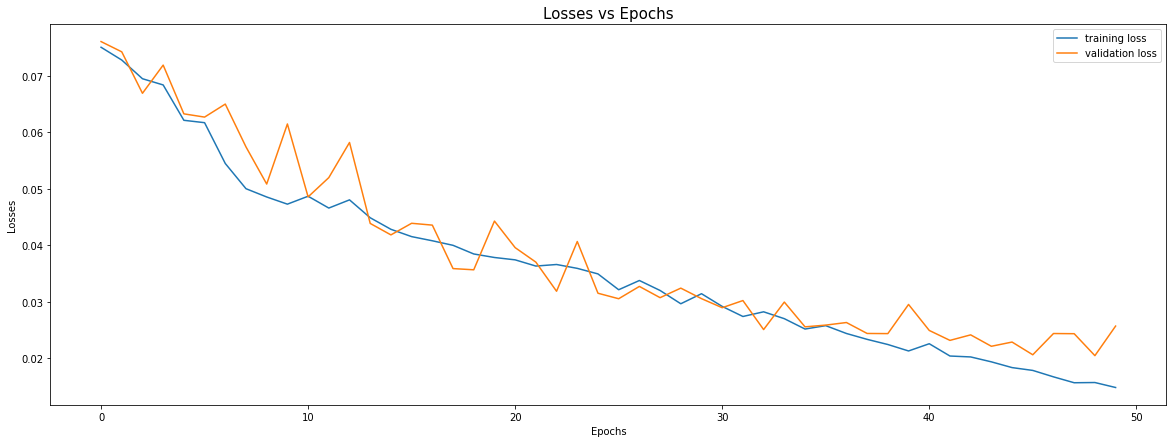

In [70]:
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs', fontsize = 15)

In [42]:
from keras.models import load_model
model = load_model('./cancer_image_model.h5')

In [43]:
y_pred = model.predict(X_test)

2/2 [==============================] - 5s 779ms/step


In [44]:
print(y_pred.shape)

(39, 128, 128, 1)


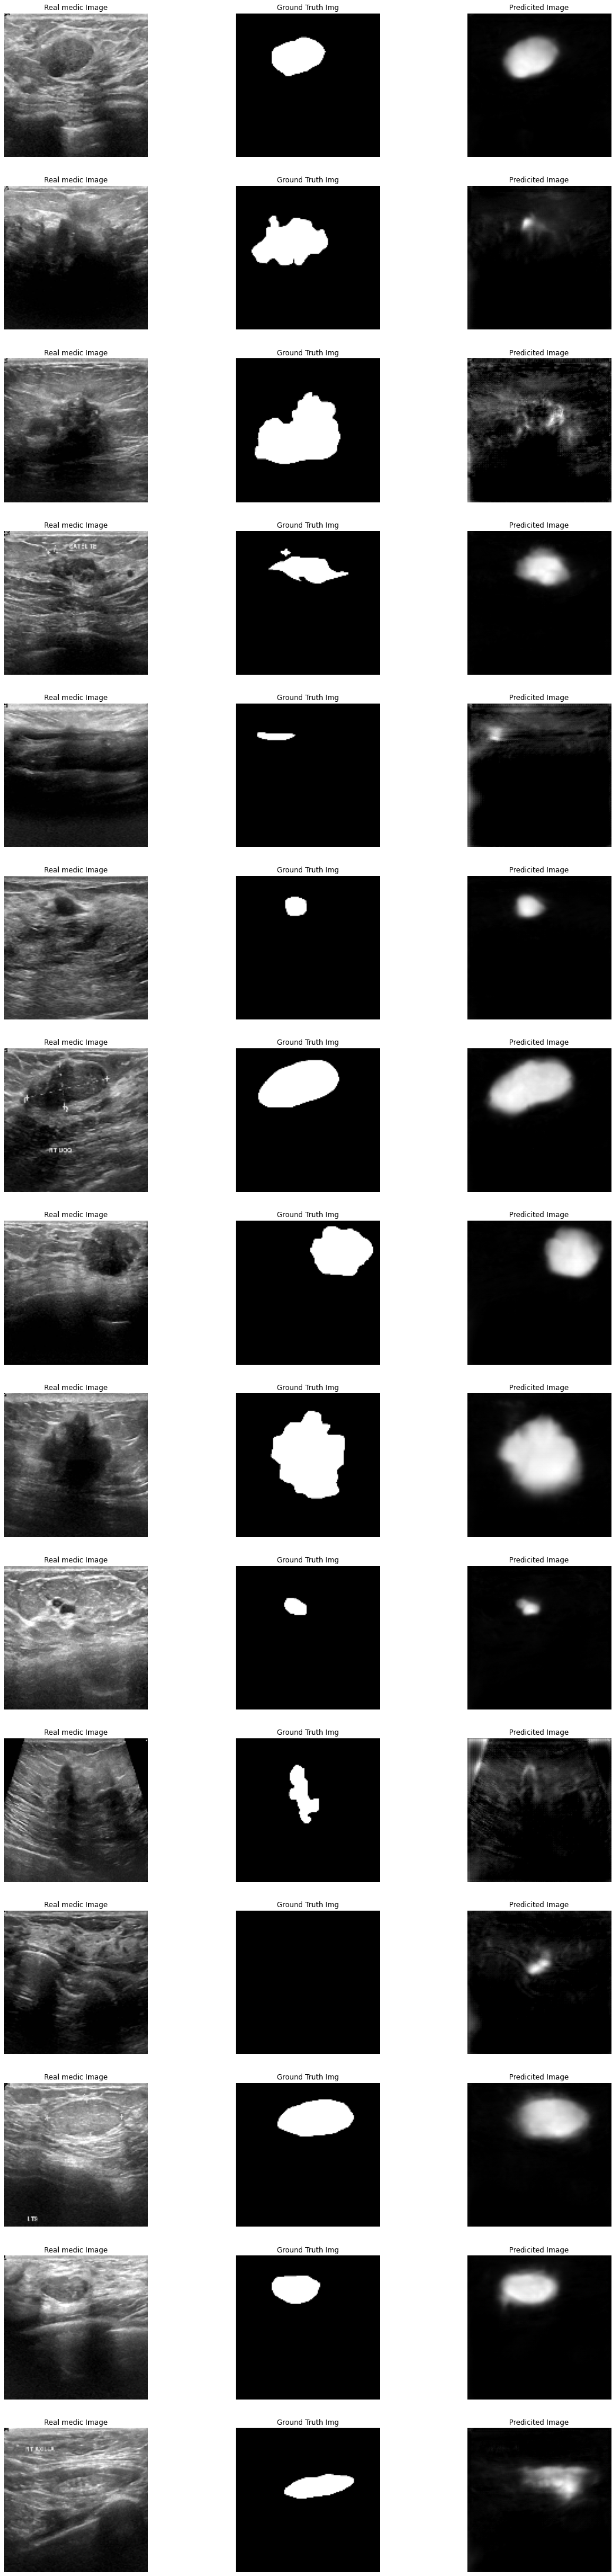

In [45]:
plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 45 :
    
    plt.subplot(15,3,i+1)
    plt.imshow(X_test[x], 'gray')
    plt.title('Real medic Image')
    plt.axis('off')
    
    plt.subplot(15,3,i+2)
    plt.imshow(y_test[x], 'gray')
    plt.title('Ground Truth Img')
    plt.axis('off')
    
    plt.subplot(15,3,i+3)
    plt.imshow(y_pred[x], 'gray')
    plt.title('Predicited Image')
    plt.axis('off')
    
    x += 1
    i += 3
plt.show()